# Laptop Price Prediction

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('laptops.csv', encoding='latin-1')
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [69]:
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### EDA

In [71]:
data_num = df.select_dtypes(include=[np.number])
data_num.head()

,Unnamed: 0,Inches,Price_euros
0,1,13.3,1339.69
1,2,13.3,898.94
2,3,15.6,575.00
3,4,15.4,2537.45
4,5,13.3,1803.60


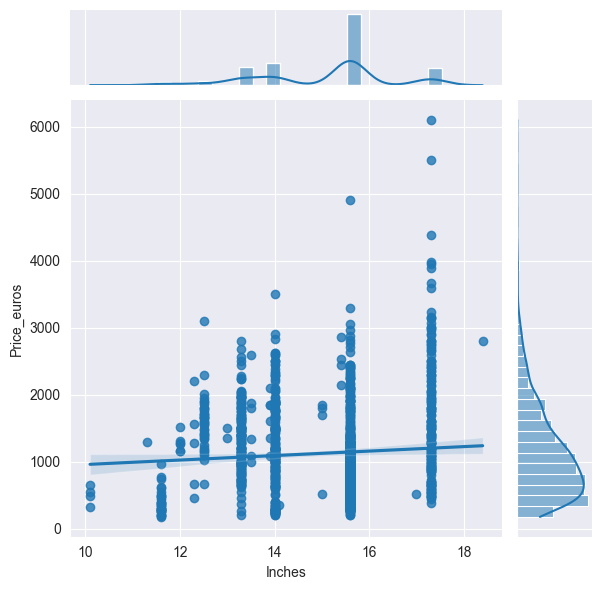

In [72]:
sns.jointplot(x='Inches', y='Price_euros', data=data_num, kind='reg')

<Axes: xlabel='Inches', ylabel='Count'>

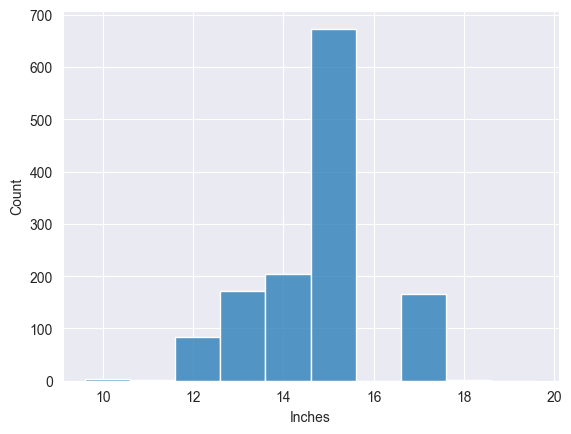

In [73]:
sns.histplot(data=data_num, x='Inches', stat='count', discrete=True, kde=False)

<Axes: xlabel='Price_euros', ylabel='Count'>

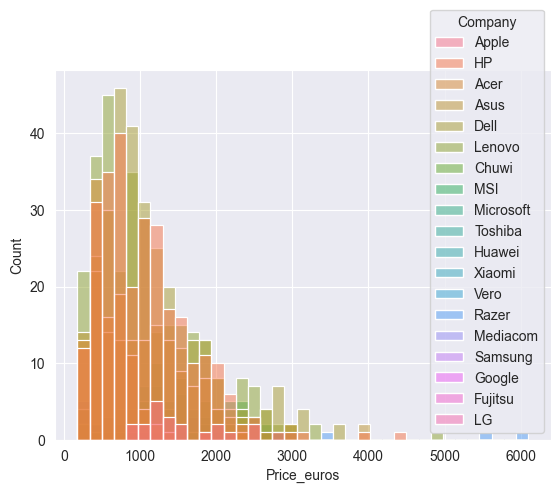

In [74]:
sns.histplot(data = df, x= "Price_euros", hue='Company')

In [75]:
df['Company'].value_counts(),df['Inches'].value_counts()

(Company
 Dell         297
 Lenovo       297
 HP           274
 Asus         158
 Acer         103
 MSI           54
 Toshiba       48
 Apple         21
 Samsung        9
 Razer          7
 Mediacom       7
 Microsoft      6
 Xiaomi         4
 Vero           4
 Chuwi          3
 Google         3
 Fujitsu        3
 LG             3
 Huawei         2
 Name: count, dtype: int64,
 Inches
 15.6    665
 14.0    197
 13.3    164
 17.3    164
 12.5     39
 11.6     33
 12.0      6
 13.5      6
 13.9      6
 12.3      5
 10.1      4
 15.4      4
 15.0      4
 13.0      2
 18.4      1
 17.0      1
 14.1      1
 11.3      1
 Name: count, dtype: int64)

In [76]:
df.drop(columns=['Unnamed: 0','TypeName','Weight'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [feature for feature in df.columns if df[feature].dtype == 'O']

for col in cols:
    df[col] = le.fit_transform(df[col])

In [78]:
df.head()

,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,1,300,13.3,23,65,8,4,58,8,1339.69
1,1,301,13.3,1,63,8,2,51,8,898.94
2,7,50,15.6,8,74,8,16,53,4,575.00
3,1,300,15.4,25,85,1,29,9,8,2537.45
4,1,300,13.3,23,67,8,16,59,8,1803.60


In [79]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

#### Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
temp = std.fit_transform(X)
X = pd.DataFrame(temp)
X.head()

,0,1,2,3,4,5,6,7,8
0,-1.333189,-0.047766,-1.204407,1.747762,-0.475914,0.865168,-1.542166,0.153493,3.083616
1,-1.333189,-0.041946,-1.204407,-1.043399,-0.555339,0.865168,-1.792003,-0.170358,3.083616
2,0.136477,-1.502761,0.408772,-0.155303,-0.118498,0.865168,-0.043142,-0.077829,-0.781657
3,-1.333189,-0.047766,0.268495,2.001504,0.318342,-1.797179,1.580802,-2.113462,3.083616
4,-1.333189,-0.047766,-1.204407,1.747762,-0.396488,0.865168,-0.043142,0.199757,3.083616


#### RandomForest Regression + Importacne test

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)

In [82]:
rf.fit(X,y)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [83]:
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

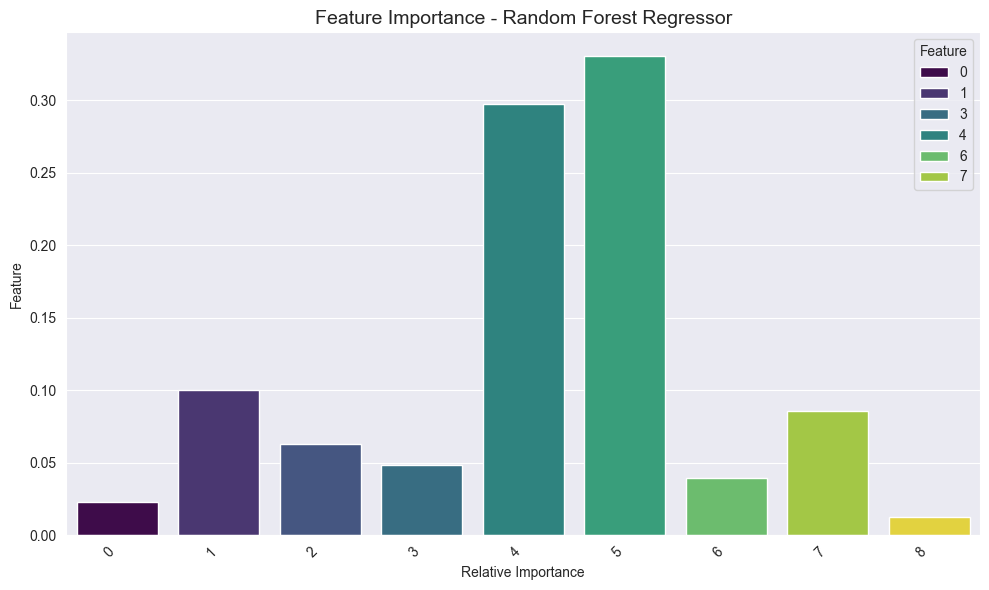

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Feature',
    y='Importance',
    hue='Feature',
    data=feat_imp,
    palette='viridis',
    dodge=False
)
plt.title('Feature Importance - Random Forest Regressor', fontsize=14)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [85]:
X.drop([0, 8], axis=1, inplace=True)
X.reset_index(drop=True, inplace=True)
X.head()

,1,2,3,4,5,6,7
0,-0.047766,-1.204407,1.747762,-0.475914,0.865168,-1.542166,0.153493
1,-0.041946,-1.204407,-1.043399,-0.555339,0.865168,-1.792003,-0.170358
2,-1.502761,0.408772,-0.155303,-0.118498,0.865168,-0.043142,-0.077829
3,-0.047766,0.268495,2.001504,0.318342,-1.797179,1.580802,-2.113462
4,-0.047766,-1.204407,1.747762,-0.396488,0.865168,-0.043142,0.199757


#### Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle = True)

In [88]:
rf.fit(X_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [89]:
y_pred = rf.predict(X_test)

In [90]:
from sklearn import metrics

print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 180.79956393336073
Residual Sum of Squares(MSE): 85795.27728786065
R2-Score: 0.8310872279663398


#### MLP Regressor

In [94]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42
)
mlp.fit(X_train, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True


In [95]:
y_pred = mlp.predict(X_test)

In [96]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 276.98542108198865
Residual Sum of Squares(MSE): 205007.72100937122
R2-Score: 0.5963831164294661
